In [1]:
# set up needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create needed functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



# import data 
michelson_experiment = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv',index_col=0)
belmont_stakes = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/7507bfed990379f246b4f166ea8a57ecf31c6c9d/belmont.csv')
# data subset for lecture reproduction:
michelson_speed_of_light = michelson_experiment['velocity of light in air (km/s)']

# Lecture:

**continuous quantieis**

michelsons' speed of light:
100 recording of speed of light
some difference for each one
are these distributed normaly?

**PDF:**
- continuous analog to PMF (Probablity Mass Function)
- mathematical description of the relative likelihood of observering a value of a continuous variable.
- area under the PDF gives probablity 

to find a prob: **CDF of normal distrinbution**


normal distribution:    
>a continuous variable whoe PDF has a single symmetric peak

two parmeters:
1. mean: cent
1. std  

In [2]:
#sample code computing the thearecial cdf of a normal distrobution 

mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean,std,size=10000)
# cdf of data 
x,y = ecdf(michelson_speed_of_light)
#cdf of proposed normal distrobution with mean and std = to observed data
x_theor, y_theor = ecdf(samples)


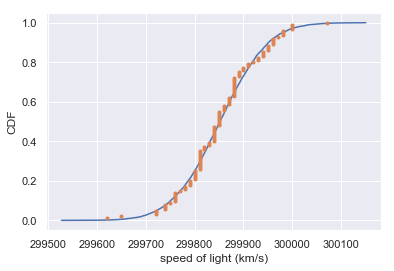

In [3]:
#visualizing#
sns.set()
#put both on same plot to evaluate wether observed data is normaly distributed
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker ='.', linestyle = 'none')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()
            

# exersize 1 
**The Normal PDF**  
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.
- Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
- Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.
- make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.


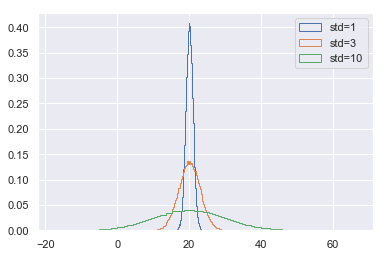

In [4]:
#draw samples
sample_std1 = np.random.normal(20,1,size = 100000)
sample_std3= np.random.normal(20,3,size = 100000)
sample_std10 = np.random.normal(20,10,size = 100000)

# Make histograms
_=plt.hist(sample_std1 ,bins =100, density=True,histtype='step')
_=plt.hist(sample_std3 ,bins =100, density=True,histtype='step')
_=plt.hist(sample_std10,bins =100, density=True,histtype='step')
# lengend
_ = plt.legend(('std=1','std=3','std=10'))
plt.ylim = (-.01,.042)

# exersize 2
**The Normal CDF**  
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

- Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.
- Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).
- make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.


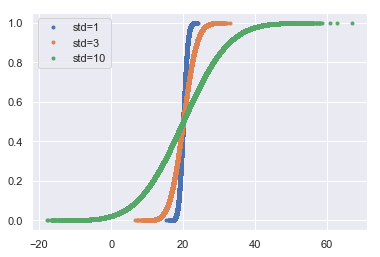

In [5]:
#Generate cdfs
x_std1, y_std1 = ecdf(sample_std1)
x_std3, y_std3 = ecdf(sample_std3)
x_std10, y_std10 = ecdf(sample_std10)

# plot CDFs
_ = plt.plot(x_std1, y_std1, marker ='.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3, marker ='.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker ='.', linestyle = 'none')

# make a legend 
_ = plt.legend(('std=1','std=3','std=10'))

#lecture cont.
**normal distribution caveats**
- things that you might think are normaly distrobuted might not be
example:
   Length of MA large mouth bass - close to normaly distributed 
**assumtion: because length is close to normaly distrobuted so is mass**

this assumtion is false:


# exersize 3  
**Are the Belmont Stakes results Normally distributed?**  
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in _1973_. While that was the fastest year, _1970_ was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

- create subset array from dataframe
    - complete any needed munging 
    

- Compute mean and standard deviation of Belmont winners' times with the two outliers removed.  

- create NumPy array `belmont_no_outliers` with outliers removed.

- Take 10,000 samples out of a normal distribution with this mean and standard deviation using `np.random.normal()`.

- Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to `x_theor, y_theor` and `x, y`, respectively.

- plot the CDF of your samples with the ECDF, label your axes and show the plot.

In [6]:
# create a np array from data frame with outliers removed and a dtype of str
belmont_no_outliers = np.array(belmont_stakes.Time[~belmont_stakes.Year.isin((1973,1970))], dtype=np.str)
#inspect
print(belmont_no_outliers[:5])

# data will need to be converted to int to perform analysis 
belmont_list = belmont_no_outliers.tolist()

for e,i in enumerate(belmont_list):
    split = i.split(":")
    a = (int(split[0])*60)+float(split[1])
    belmont_list[e]=round(a,2)
belmont_no_outliers = np.array(belmont_list,dtype=np.int)

['2:28.51' '2:26.65' '2:28.52' '2:30.70' '2:30.42']


In [7]:
# computer mean and standard div of times
mu = np.mean(belmont_no_outliers)
sigma = belmont_no_outliers.std() 

# exercise 4 
**What are the chances of a horse matching or beating Secretariat's record?**  
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

**Instructions**

- Take `1,000,000` samples from the normal distribution using the `np.random.normal()` function. The mean `mu` and standard deviation `sigma` should still be loaded into the namespace from the previous exersize.
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.


In [8]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu,sigma,size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = sum(samples<=144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.001705


# lecture: the exponential distribution

**the exponential distribution**:
- the wiating time between arrivals of a poisson proces is exponentially distributed

**Possible Poisson process**
- Nuclear incidents:
    - timing of one independent of all others
  

# Exersize 4

**If you have a story, you can simulate it!**

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

**Instructions:**

- Define a function with call signature `successive_poisson(tau1, tau2, size=1)` that samples the waiting time for a no-hitter and a hit of the cycle.

- Draw waiting times `tau1` (`size` number of samples) for the no-hitter out of an exponential distribution and assign to `t1`.

- Draw waiting times `tau2` (`size` number of samples) for hitting the cycle out of an exponential distribution and assign to `t2`.

- The function returns the sum of the waiting times for the two events.

In [10]:
def successive_poisson(tau1,tau2, size=1):
    """Compute time for arrival of 2 successsive Poisson processes."""    
    #draw no -hitter tau1 out of exponetional distribution
    t1 = np.random.exponential(tau1,size=size)
    t2 = np.random.exponential(tau2, size=size)
    return t1+t2

# Exersize 5

**Distribution of no-hitters and cycles** 

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

**Instructions:**

- Use your `successive_poisson()` function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.

- Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use `bins=100`, `normed=True`, and `histtype='step'`.

- Label the axes.

- Show your plot.

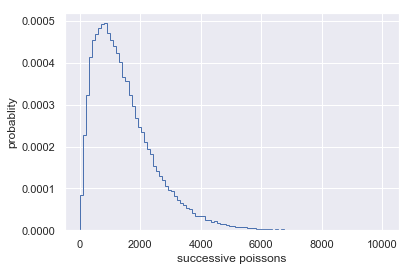

In [11]:
# using Successive_poisson() to draw samples

waiting_times = successive_poisson(764,715,  size = 100000)

# making histogram

_ = plt.hist(waiting_times,bins= 100, density=True, histtype='step')
_ = plt.ylabel('probablity')
_ = plt.xlabel('successive poissons')


# extra credit

**ploting the CDF**

- utlize ECDF function 
- plot

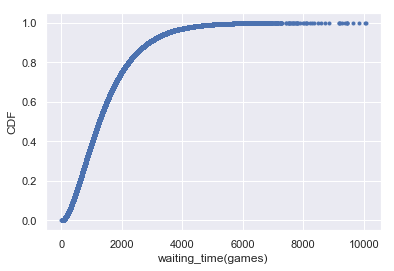

In [12]:
x ,y = ecdf(waiting_times)

_ = plt.plot(x, y, marker ='.', linestyle = 'none')
_ = plt.ylabel('CDF')
_ = plt.xlabel('waiting_time(games)')